In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [120]:
import pandas as pd
reviews_df=pd.read_csv(r'D:\Crayon_Candidate_Screening\NLP\Review_set_hotel.csv')
reviews_df.head()

,Unnamed: 0,EstablishmentId,Summary
0,0,111850,When you stay at NH Vienna Airport Conference ...
1,1,111870,Property Location <br/>With a stay at Enziana ...
2,2,111956,"Grand not only in name but also in comfort, st..."
3,3,112159,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...
4,4,112165,"A blend of design and warmth, the 4 star Hotel..."


In [123]:
#reviews_df.EstablishmentId.value_counts()

##Each establishment ID is unique. So it doesn't make any sense to keep them in the data at it is noise

In [124]:
df=reviews_df[['Summary']]

In [130]:
df.Summary[0]

"When you stay at NH Vienna Airport Conference Center in Schwechat, you'll be near the airport and within the vicinity of Central Cemetery and Neugebaude Castle. This 4-star hotel is within the region of Golf Club Leopoldsdorf and Gasometer.Rooms Make yourself at home in one of the 500 air-conditioned rooms featuring minibars. Complimentary wireless Internet access is available to keep you connected. Conveniences include direct-dial phones, as well as safes and desks.Rec, Spa, Premium Amenities Take advantage of recreational opportunities offered, including a sauna, a steam room, and a fitness facility. Additional features include wireless Internet access (surcharge), a television in the lobby, and tour/ticket assistance.Dining Enjoy a meal at a restaurant, or stay in and take advantage of the hotel's 24-hour room service."

In [ ]:
#removing tags

In [126]:
import re

def remove_tags(text):
    return re.compile(r'<[^>]+>').sub('', text)

In [129]:
df['Summary']=df['Summary'].apply(str)
df['Summary']= df['Summary'].apply(lambda x: remove_tags(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
import nltk

def remove_puncutaion(text):    
    words = nltk.word_tokenize(text)
    words=[word for word in words if word.isalpha()]
    return (' '.join(words))

In [142]:
df['Summary_2']= df['Summary'].apply(lambda x: remove_puncutaion(x))

In [138]:
import re
def remove_puncutaion2(text):
    return (re.sub(r'[!,.:;-](?= |$)',r'',text))

In [143]:
df['Summary_3']= df['Summary'].apply(lambda x: remove_puncutaion2(x))

In [145]:
#df

In [148]:
df.Summary[2]

'Grand not only in name but also in comfort, style and location, the Warwick Brussels has become the premier hotel amongst refined Belgian visitors. By blending classic charm with luxury amenities that are expected from a Warwick Hotel, guests are treated to the feel of Old World elegance with the added convenience of modern accommodations. The Grand Place, Le Square Convention Centre and Manneken Pis are all but a stoneâ€™s throw from the hotelâ€™s doorstep, putting guests in the centre of Belgiumâ€™s awe-inspiring architecture and welcoming culture. Whether meeting for important business gatherings or a sumptuous Belgian weekend, itâ€™s all here. Welcome to the Warwick Brussels.'

In [149]:
import spacy
nlp = spacy.load('en')    

In [177]:
def Hotel_Location_finder(text):
    doc = nlp(text)
    for ent in doc.ents:
        if 'hotel' in str(ent).lower():
            if str(ent).lower() != 'hotel':
                if str(ent).lower() != 'hotels':
                    return(str(ent))

In [178]:
df['Hotel']= df['Summary'].apply(lambda x: Hotel_Location_finder(x))

In [185]:
rest_df=df[df['Hotel'].isnull()]

In [186]:
rest_df

,Summary,Summary_3,Summary_2,Hotel
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,None
5,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,None
6,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,None
7,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,None
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,None
11,"With a stay at Hotel Zenit Malaga in Malaga, y...",With a stay at Hotel Zenit Malaga in Malaga yo...,With a stay at Hotel Zenit Malaga in Malaga yo...,None
12,"Stately, with the air of an era long gone, the...",Stately with the air of an era long gone the E...,Stately with the air of an era long gone the E...,None
13,"The NH Laguna Palace hotel is a striking, cont...",The NH Laguna Palace hotel is a striking conte...,The NH Laguna Palace hotel is a striking conte...,None
15,"db San Antonio Hotel + Spa, Malta, welcomes yo...",db San Antonio Hotel + Spa Malta welcomes you ...,db San Antonio Hotel Spa Malta welcomes you to...,None
16,The family-friendly Occidental Tucancun is ide...,The family-friendly Occidental Tucancun is ide...,The Occidental Tucancun is ideally situated di...,None


In [252]:
def Hotel_Location_finder(text):
    doc = nlp(text)
    for ent in doc.ents:        
        if str(ent.label_)=='GPE':
            return(str(ent))
        if str(ent.label_)=='PERSON':
            return(str(ent))
        #retrun(ent,ent.label_)

In [255]:
rest_df['Hotel']= rest_df['Summary_2'].apply(lambda x: Hotel_Location_finder(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
rest_df

,Summary,Summary_3,Summary_2,Hotel
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,Schwechat
5,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,NH Geneva City
6,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,Zurich
7,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis
11,"With a stay at Hotel Zenit Malaga in Malaga, y...",With a stay at Hotel Zenit Malaga in Malaga yo...,With a stay at Hotel Zenit Malaga in Malaga yo...,Zenit Malaga
12,"Stately, with the air of an era long gone, the...",Stately with the air of an era long gone the E...,Stately with the air of an era long gone the E...,Plaka
13,"The NH Laguna Palace hotel is a striking, cont...",The NH Laguna Palace hotel is a striking conte...,The NH Laguna Palace hotel is a striking conte...,Mestre
15,"db San Antonio Hotel + Spa, Malta, welcomes yo...",db San Antonio Hotel + Spa Malta welcomes you ...,db San Antonio Hotel Spa Malta welcomes you to...,San Antonio
16,The family-friendly Occidental Tucancun is ide...,The family-friendly Occidental Tucancun is ide...,The Occidental Tucancun is ideally situated di...,None


In [258]:
df.loc[df.Hotel.isin(rest_df.Hotel), ['Hotel']]= rest_df[['Hotel']]

In [263]:
!pip install textblob

In [271]:
from textblob import TextBlob

In [272]:
def sentiment_returner(text):
    return TextBlob(text).polarity

In [396]:
df['raw_sentiment']= df['Summary'].apply(lambda x: sentiment_returner(x))

# General Sentiment Analysis

In [291]:
text=' '.join(df.Summary_2).lower()

In [294]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [296]:
def remove_stop_words(text):
        new_text = ' '.join([word for word in text.split() if word not in stop_words])
        return new_text

In [297]:
new_text=remove_stop_words(text)

In [327]:
new_text2=[]

In [328]:
from textblob import Word
for i in new_text.split():
    new_text2.append(Word(i).lemmatize())    

In [329]:
from collections import Counter

In [332]:
Counter(new_text2).most_common()

[('hotel', 2993),
 ('room', 1909),
 ('city', 822),
 ('located', 747),
 ('offer', 742),
 ('restaurant', 670),
 ('guest', 627),
 ('service', 596),
 ('free', 551),
 ('access', 515),
 ('centre', 506),
 ('feature', 482),
 ('also', 463),
 ('one', 451),
 ('bar', 445),
 ('minute', 443),
 ('available', 441),
 ('internet', 440),
 ('area', 439),
 ('amenity', 437),
 ('view', 397),
 ('include', 391),
 ('within', 389),
 ('stay', 388),
 ('bathroom', 385),
 ('close', 384),
 ('complimentary', 383),
 ('modern', 383),
 ('private', 376),
 ('enjoy', 373),
 ('airport', 371),
 ('suite', 371),
 ('away', 370),
 ('pool', 366),
 ('business', 364),
 ('facility', 362),
 ('tv', 360),
 ('station', 340),
 ('spa', 339),
 ('make', 333),
 ('walk', 333),
 ('property', 319),
 ('heart', 311),
 ('breakfast', 307),
 ('location', 303),
 ('km', 299),
 ('wireless', 286),
 ('well', 286),
 ('dubai', 286),
 ('center', 279),
 ('international', 279),
 ('apartment', 266),
 ('de', 255),
 ('equipped', 253),
 ('shopping', 252),
 ('home'

In [333]:
new_text_data=[]

In [334]:
for word in Counter(new_text2).most_common():
    new_text_data.append(word[0])

In [338]:
important_nouns =[]
important_verbs =[]

In [339]:
for i in new_text_data[:500]:
    tags=TextBlob(i).tags[0]
    if tags[1]=='NN':
        important_nouns.append(tags[0])
    if tags[1]=='VBN':
        important_verbs.append(tags[0])

In [344]:
new_text_nouns_only_for_importance = [i for i in new_text2 if i in important_nouns]

In [345]:
new_text_verbs_only_for_importance = [i for i in new_text2 if i in important_verbs]

In [348]:
important_verbs=[]
for word in Counter(new_text_verbs_only_for_importance).most_common():
    important_verbs.append(word[0])

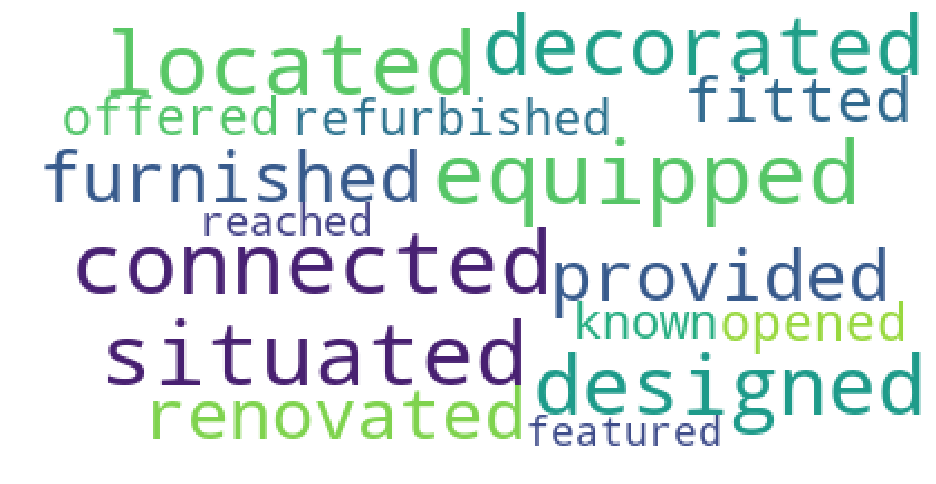

In [349]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,12.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=900             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(important_verbs))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("important_verbs.png", dpi=900)

In [350]:
important_nouns=[]
for word in Counter(new_text_nouns_only_for_importance).most_common():
    important_nouns.append(word[0])

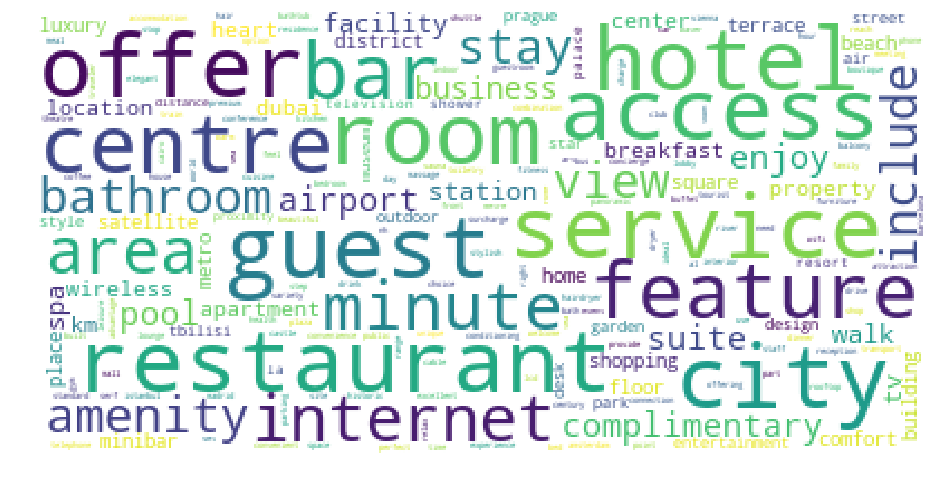

In [352]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,12.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=900             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(important_nouns))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("important_nouns.png", dpi=900)

# Bigrams

In [364]:
bigrm = list(nltk.bigrams(new_text2))

In [379]:
new_bigram_text=[]

In [382]:
for i in bigrm:
    new_bigram_text.append(' '.join(i))

# Happy Customers are very particular about Access to internet, Hotel Location, Home like experience, proximity to airport, and Air conditioning Facilities

In [386]:
Counter(new_bigram_text).most_common(15)

[('internet access', 318),
 ('wireless internet', 278),
 ('private bathroom', 189),
 ('hotel located', 180),
 ('hotel offer', 177),
 ('complimentary wireless', 176),
 ('home one', 142),
 ('make home', 140),
 ('close proximity', 136),
 ('hotel within', 129),
 ('within close', 128),
 ('keep connected', 124),
 ('international airport', 124),
 ('city centre', 123),
 ('air conditioning', 122)]

In [405]:
df.loc[df['raw_sentiment']<0]

,Summary,Summary_3,Summary_2,Hotel,raw_sentiment
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis,-0.012500
24,"Situated in the heart of Taksim, the Green Par...",Situated in the heart of Taksim the Green Park...,Situated in the heart of Taksim the Green Park...,the Green Park Hotel,-0.070000
85,"3 stars family owned and managed property, hal...",3 stars family owned and managed property half...,stars family owned and managed property halfwa...,None,-0.021212
481,"Small boutique hotel with 74 rooms, of which t...",Small boutique hotel with 74 rooms of which th...,Small boutique hotel with rooms of which there...,None,-0.009394
554,swimming pool will be closed from January 26th...,swimming pool will be closed from January 26th...,swimming pool will be closed from January till...,None,-0.112500
838,An urban retreat in an estate with manicured g...,An urban retreat in an estate with manicured g...,An urban retreat in an estate with manicured g...,Dubai,-0.133333
1181,"Entering from the beach road, you pass the Tro...",Entering from the beach road you pass the Trop...,Entering from the beach road you pass the Trop...,the Tropica Bungalow Hotel & Restaurant,-0.014935
1205,Hotel Exe Moncloa is located in Madrid's Chamb...,Hotel Exe Moncloa is located in Madrid's Chamb...,Hotel Exe Moncloa is located in Madrid Chamber...,Hotel Exe Moncloa,-0.040000


In [456]:
df.Summary[838]

'An urban retreat in an estate with manicured gardens, polo grounds, stables and a riding school. Approximately 20 minutes from Dubai downtown and Dubai International Airport. Features 38 keys of rooms, suites and villas; choices of restaurant, lounge and bars; and a spa.'

In [419]:
df.head()

,Summary,Summary_3,Summary_2,Hotel,raw_sentiment
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,Schwechat,0.183333
1,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Enziana Hotel,0.150000
2,"Grand not only in name but also in comfort, st...",Grand not only in name but also in comfort sty...,Grand not only in name but also in comfort sty...,a Warwick Hotel,0.285185
3,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...,Arty Cosy Trendy The 4 star Hotel Nâ€™vY is ch...,Arty Cosy Trendy The star Hotel is characteris...,Hotel Nâ€™,0.250000
4,"A blend of design and warmth, the 4 star Hotel...",A blend of design and warmth the 4 star Hotel ...,A blend of design and warmth the star Hotel Au...,Hotel Auteuil,0.510185


In [446]:
def mean(numbers):
    numbers=[i for i in numbers if i != 0.0]
    return float(sum(numbers)) / max(len(numbers), 1)

In [449]:
def sentiment(text): 
    sentiments=[]
    for i in TextBlob(text).sentences:
        sentiments.append(i.polarity)
        #print(i)
        #print(i.polarity)
    return mean(sentiments)

In [450]:
df['sentence_sentiment']= df['Summary'].apply(lambda x: sentiment(x))

In [452]:
df.Summary[8]

'Le Meridien Heliopolis is a luxurious 5-star hotel conveniently located only 5.1km (3.2mi) from the centre of Cairo. Local tourist attractions such as Heliopolis and Egyptian Presidential Palace are not far from the hotel.'

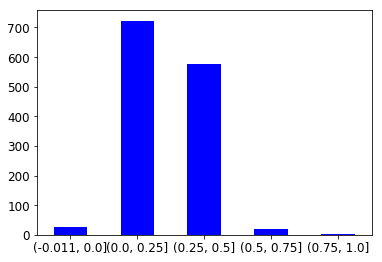

In [455]:
out = pd.cut(df['raw_sentiment'], bins=[-0.01,0, 0.25, 0.5, 0.75, 1], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

# False Negatives cases

In [460]:
len(df.loc[df['raw_sentiment']<0])/len(df)*100

0.5908419497784343

In [ ]:
df.Hotel.value_counts()[:10].plot(kind='bar')